In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/ML_Fundamentals/returns.csv')

In [4]:
df.head()

,symbol,Industry,avg200603,avg200604,avg200605,avg200606,avg200607,avg200608,avg200609,avg200610,...,avg201505,avg201506,avg201507,avg201508,avg201509,avg201510,avg201511,avg201512,avg201601,avg201602
0,A,Health Care,0.039334,0.016401,-0.094683,-0.090490,-0.103653,0.135238,0.016478,0.095077,...,-0.005313,-0.068791,0.052970,-0.112659,-0.027479,0.100233,0.104304,-0.008302,-0.083049,-0.000535
1,AA,Materials,0.040890,0.098826,-0.070155,0.017606,-0.095683,-0.041422,-0.025758,0.031387,...,-0.074074,-0.110845,-0.118750,-0.037678,0.055738,-0.080330,0.045810,0.043340,-0.234244,0.210027
2,AAPL,Information Technology,-0.087448,0.107115,-0.158681,-0.042606,0.179764,0.009372,0.124141,0.078695,...,0.033148,-0.037228,-0.044129,-0.071934,0.001362,0.095627,-0.020695,-0.113600,-0.051360,0.002281
3,ABC,Health Care,0.044538,-0.108473,0.011936,-0.043327,0.024801,0.028526,0.015506,0.039004,...,-0.022238,-0.057353,-0.013250,-0.053995,-0.026243,0.016002,0.011589,0.049272,-0.124621,-0.027943
4,ABT,Health Care,-0.038708,0.017038,-0.001169,0.019183,0.100906,0.026554,-0.005738,0.001319,...,0.040462,0.006356,0.026113,-0.110041,-0.090457,0.110285,0.000891,-0.006855,-0.138598,0.071053


#5.1a

In [5]:
df[df['Industry']=='Consumer Discretionary'].count()

symbol       69
Industry     69
avg200603    69
avg200604    69
avg200605    69
             ..
avg201510    69
avg201511    69
avg201512    69
avg201601    69
avg201602    69
Length: 122, dtype: int64

In [6]:
df[df['Industry']=='Energy'].count()

symbol       38
Industry     38
avg200603    38
avg200604    38
avg200605    38
             ..
avg201510    38
avg201511    38
avg201512    38
avg201601    38
avg201602    38
Length: 122, dtype: int64

##There are 69 companies in Consumer Discretionary sector and 38 companies in Energy sector

#Q5.1b

In [7]:
df.columns

Index(['symbol', 'Industry', 'avg200603', 'avg200604', 'avg200605',
       'avg200606', 'avg200607', 'avg200608', 'avg200609', 'avg200610',
       ...
       'avg201505', 'avg201506', 'avg201507', 'avg201508', 'avg201509',
       'avg201510', 'avg201511', 'avg201512', 'avg201601', 'avg201602'],
      dtype='object', length=122)

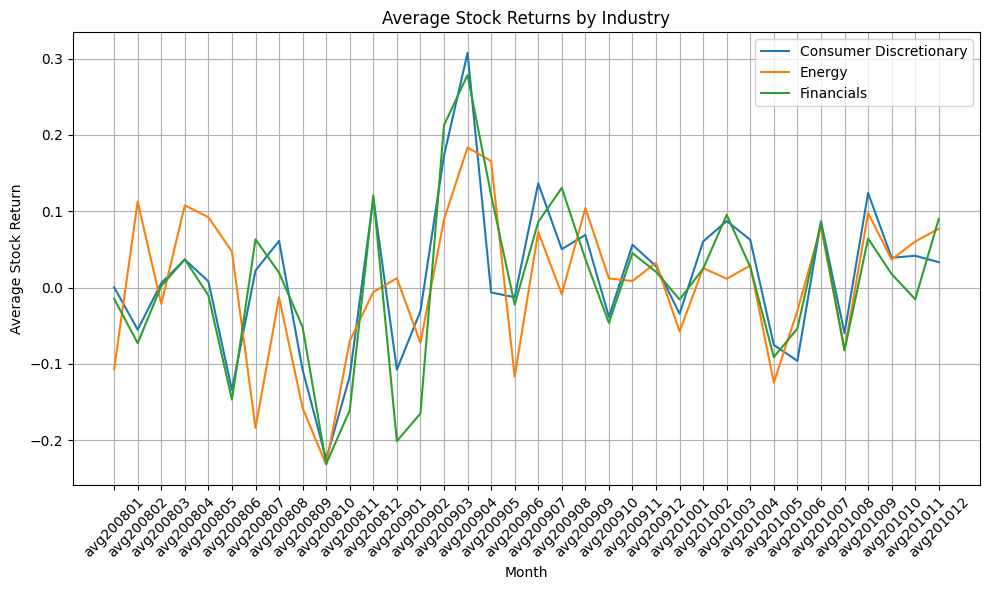

In [8]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
filtered_df = df[df['Industry'].isin(['Energy', 'Consumer Discretionary', 'Financials'])]


for industry, data in filtered_df.groupby('Industry'):

    avg_returns = data.loc[:, 'avg200801':'avg201012'].mean()


    plt.plot(avg_returns.index, avg_returns.values, label=industry)




plt.xlabel('Month')
plt.ylabel('Average Stock Return')
plt.title('Average Stock Returns by Industry')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

##We feel just the industry information is not sufficient for the investors to build a diversification strategy. Some other parameters like the trends over time and each company's financials and other factors could help make decisions.

#Q5.2a

In [9]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_clustering = df.loc[:, 'avg200603':'avg201602']

clustering = KMeans(n_clusters=4,n_init=20)

clustering.fit(df_clustering)

KMeans(n_clusters=4, n_init=20)

In [10]:
# clustering.cluster_centers_

In [11]:
# clustering.labels_

In [12]:
# clustering.inertia_

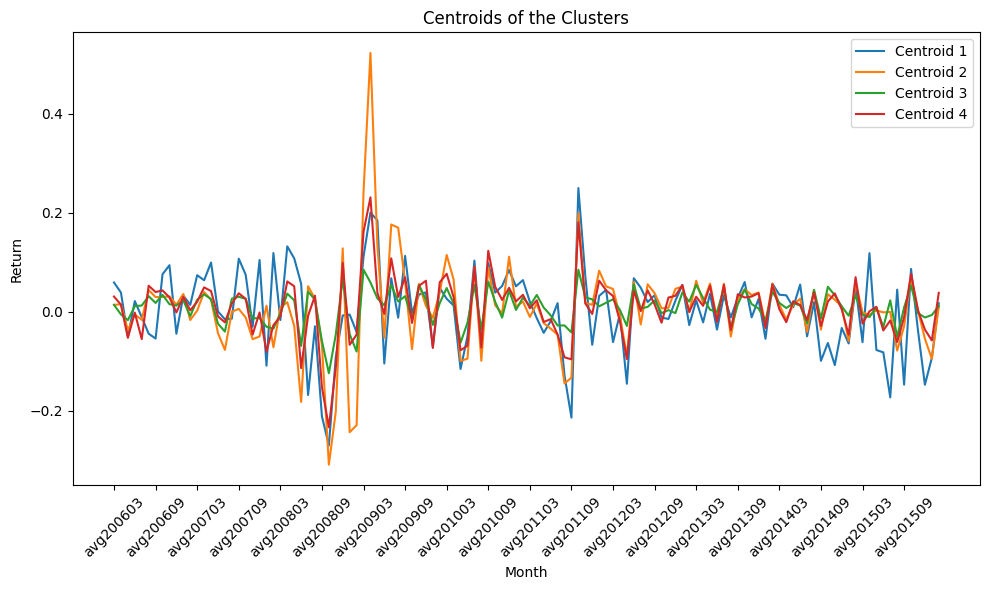

In [13]:
centroids = clustering.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns= df_clustering.columns)

plt.figure(figsize=(10, 6))

for i in range(len(centroids)):
    plt.plot(centroids_df.columns, centroids_df.iloc[i], label=f'Centroid {i+1}')

plt.xlabel('Month')
plt.ylabel('Return')
plt.title('Centroids of the Clusters')
plt.xticks(np.arange(0, len(centroids_df.columns), 6), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

#5.2b

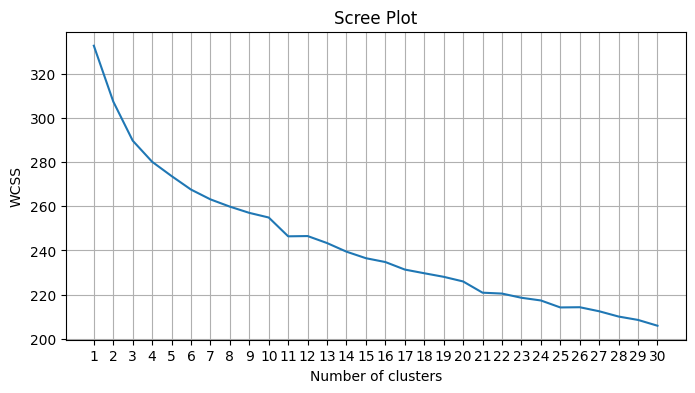

In [14]:

WCSS = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df_clustering)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 31), WCSS)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.xticks(np.arange(1, 31, 1))
plt.show()

#Q5.2c

##I think 12 is the reasonable number of clusters, since after that the decrease is gradual

#Q5.2d

In [15]:
df_clustering = df.loc[:, 'avg200603':'avg201602']

clustering = KMeans(n_clusters=12,n_init=20)

clustering.fit(df_clustering)

KMeans(n_clusters=12, n_init=20)

In [16]:
df['Cluster'] = clustering.labels_

In [17]:
df.head()

,symbol,Industry,avg200603,avg200604,avg200605,avg200606,avg200607,avg200608,avg200609,avg200610,...,avg201506,avg201507,avg201508,avg201509,avg201510,avg201511,avg201512,avg201601,avg201602,Cluster
0,A,Health Care,0.039334,0.016401,-0.094683,-0.090490,-0.103653,0.135238,0.016478,0.095077,...,-0.068791,0.052970,-0.112659,-0.027479,0.100233,0.104304,-0.008302,-0.083049,-0.000535,5
1,AA,Materials,0.040890,0.098826,-0.070155,0.017606,-0.095683,-0.041422,-0.025758,0.031387,...,-0.110845,-0.118750,-0.037678,0.055738,-0.080330,0.045810,0.043340,-0.234244,0.210027,1
2,AAPL,Information Technology,-0.087448,0.107115,-0.158681,-0.042606,0.179764,0.009372,0.124141,0.078695,...,-0.037228,-0.044129,-0.071934,0.001362,0.095627,-0.020695,-0.113600,-0.051360,0.002281,5
3,ABC,Health Care,0.044538,-0.108473,0.011936,-0.043327,0.024801,0.028526,0.015506,0.039004,...,-0.057353,-0.013250,-0.053995,-0.026243,0.016002,0.011589,0.049272,-0.124621,-0.027943,9
4,ABT,Health Care,-0.038708,0.017038,-0.001169,0.019183,0.100906,0.026554,-0.005738,0.001319,...,0.006356,0.026113,-0.110041,-0.090457,0.110285,0.000891,-0.006855,-0.138598,0.071053,9


In [18]:
# number of companies in each cluster

df['Cluster'].value_counts()

9     97
5     91
1     58
11    47
0     40
4     27
3     22
8     20
2     13
6     12
7      5
10     1
Name: Cluster, dtype: int64

In [19]:
df.groupby(['Cluster', 'Industry']).size()

Cluster  Industry                   
0        Energy                         33
         Industrials                     3
         Materials                       4
1        Consumer Discretionary         14
         Consumer Staples                3
         Financials                     11
         Health Care                     2
         Industrials                    13
         Information Technology          8
         Materials                       6
         Utilities                       1
2        Financials                     13
3        Consumer Discretionary         11
         Financials                      4
         Health Care                     1
         Industrials                     2
         Materials                       4
4        Consumer Discretionary         10
         Consumer Staples                1
         Financials                      2
         Industrials                     1
         Information Technology         13
5        Consumer

#Q5.2e

In [20]:
for cluster_label in range(12):
    print("for cluster", cluster_label, "avg returns are",df[df['Cluster'] == cluster_label]['avg200810'].mean())

for cluster 0 avg returns are -0.264581341075
for cluster 1 avg returns are -0.2801754773448276
for cluster 2 avg returns are -0.3032852713846154
for cluster 3 avg returns are -0.3186226948181818
for cluster 4 avg returns are -0.26963019725925924
for cluster 5 avg returns are -0.19555256230769233
for cluster 6 avg returns are -0.10181600116666666
for cluster 7 avg returns are -0.5691845994
for cluster 8 avg returns are -0.12011217345
for cluster 9 avg returns are -0.10617865560824744
for cluster 10 avg returns are -0.493296515
for cluster 11 avg returns are -0.1458505869361702


In [21]:
for cluster_label in range(12):
    print("for cluster", cluster_label, "avg returns are",df[df['Cluster'] == cluster_label]['avg200903'].mean())

for cluster 0 avg returns are 0.11051210995
for cluster 1 avg returns are 0.16387407181034483
for cluster 2 avg returns are 0.07013912046153846
for cluster 3 avg returns are 0.21415202536363634
for cluster 4 avg returns are 0.28491997622222226
for cluster 5 avg returns are 0.09502984397802199
for cluster 6 avg returns are 0.26715522541666664
for cluster 7 avg returns are 0.2065956196
for cluster 8 avg returns are 0.19825674005
for cluster 9 avg returns are 0.05813187655670103
for cluster 10 avg returns are 0.941171774
for cluster 11 avg returns are 0.16625136936170212


##The worst returns for Oct 2008 is for cluster number 0, having average decrease of 49%. The best returns for March in 2009 are for cluster number 0 with 94% increase in the average returns.

#Q5.3a

Spectral clustering relies on a similarity matrix as input, where each entry represents the similarity between two data points. However, correlations, commonly used to measure the relationship between variables, pose challenges in this context. Firstly, correlations can yield negative values, which conflicts with spectral clustering's preference for non-negative similarity measures. Secondly, while correlations range from -1 to 1, spectral clustering algorithms often expect similarity measures within a range from 0 to 1. Negative correlations may not align with the algorithm's expectation of non-negative similarity measures.

Hence, correlations may not directly serve as suitable inputs for spectral clustering due to their potential for negative values and their range extending beyond the typical bounds of similarity measures expected by such algorithms. Spectral clustering requires similarity matrices composed of non-negative values, and the interpretation of negative correlations as dissimilarity poses challenges in aligning with the algorithm's expectations. Therefore, preprocessing steps or alternative similarity measures may be necessary to adapt correlation-based similarities for spectral clustering effectively.

#Q5.3b

Various modifications can be proposed to adapt correlation coefficients for use as similarities in spectral clustering. One approach is to take the absolute value of the correlation coefficients, effectively treating all correlations as positive. However, this simplification comes at the cost of losing information about the directionality of the correlation.

Another modification involves squaring the correlation coefficients, which retains the meaning of correlated and uncorrelated pairs while avoiding penalization of negative correlations. Nevertheless, this method may overemphasize strong relationships and overlook meaningful but weaker correlations.

A third modification is to exponentiate the correlation coefficients, preserving their directionality. Positive correlations yield scores higher than 1, while negative correlations yield scores lower than 1. However, exponential transformation may lead to disproportionately high scores for higher correlation values, potentially distorting the similarity scores. The choice of modification depends on the specific requirements of the spectral clustering algorithm and the dataset characteristics.

We will be using the squaring correlations method as the similarity score.

#Q5.3c

In [29]:
correlation_matrix = df_clustering.corr()

print(correlation_matrix)
similarity_matrix = np.exp(correlation_matrix)

spectral_clust = SpectralClustering(n_clusters=12, affinity='precomputed', random_state=42)

clusters = spectral_clust.fit_predict(similarity_matrix)

clusters

           avg200603  avg200604  avg200605  avg200606  avg200607  avg200608  \
avg200603   1.000000  -0.054870   0.014157   0.155325  -0.134647  -0.226955   
avg200604  -0.054870   1.000000  -0.014544   0.021180  -0.036688  -0.226489   
avg200605   0.014157  -0.014544   1.000000   0.043093   0.114119  -0.280459   
avg200606   0.155325   0.021180   0.043093   1.000000  -0.012544  -0.223067   
avg200607  -0.134647  -0.036688   0.114119  -0.012544   1.000000  -0.186246   
...              ...        ...        ...        ...        ...        ...   
avg201510   0.009732  -0.006338  -0.162293  -0.021540  -0.043162   0.045484   
avg201511  -0.005721   0.010682   0.006031  -0.074575  -0.030752   0.022250   
avg201512  -0.168748  -0.146452   0.059093  -0.070560   0.066161   0.223303   
avg201601  -0.112799  -0.020598   0.086699   0.151514   0.160150   0.053807   
avg201602   0.147108  -0.041446  -0.033947   0.049777  -0.230408   0.137604   

           avg200609  avg200610  avg200611  avg2006

array([ 2,  8,  0,  2,  8,  5,  4,  4, 11,  0, 11,  0,  2,  3,  2,  3,  2,
        0,  2, 11,  0, 11,  1,  6, 10,  4,  6,  7,  1,  4,  1,  1,  1,  5,
        5,  3,  8, 10,  8,  5, 10,  8,  2,  7,  5,  6,  1,  4,  2,  1,  5,
        7, 10,  5,  3,  0,  4,  8,  6,  3,  7,  5,  5,  4,  7,  5,  9, 10,
        1,  1,  6,  3,  5, 10,  1, 11,  7,  3, 11,  7,  3,  6,  6,  9,  8,
        5,  3,  9,  3, 11,  6, 11,  3, 11,  6,  4,  8,  7,  6,  6,  2,  7,
        9,  5,  5,  1,  5,  3,  9,  2,  5,  2,  9,  7,  9,  2,  6,  5,  9,
        4], dtype=int32)

In [30]:
df_clustering[clustering.labels_ == 1]

,avg200603,avg200604,avg200605,avg200606,avg200607,avg200608,avg200609,avg200610,avg200611,avg200612,...,avg201505,avg201506,avg201507,avg201508,avg201509,avg201510,avg201511,avg201512,avg201601,avg201602
1,0.040890,0.098826,-0.070155,0.017606,-0.095683,-0.041422,-0.025758,0.031387,0.075859,-0.038484,...,-0.074074,-0.110845,-0.118750,-0.037678,0.055738,-0.080330,0.045810,0.043340,-0.234244,0.210027
6,-0.092160,0.115406,-0.269476,0.061715,-0.067952,0.143662,0.151152,0.017021,0.048615,0.022659,...,0.036702,0.018994,0.005149,-0.043928,0.066822,0.075710,0.027294,0.020976,-0.028768,-0.034142
10,-0.027020,0.100183,-0.131905,-0.059049,-0.010429,0.045701,0.000000,0.064928,0.115051,-0.017488,...,-0.051830,-0.079242,-0.000198,-0.117758,-0.034558,0.263507,0.143398,-0.041680,-0.219797,0.109110
13,-0.013321,-0.006433,0.081808,-0.000543,0.065415,0.073779,-0.034935,0.077452,0.060322,-0.060980,...,0.027190,-0.024283,-0.037594,-0.063963,-0.168930,0.110548,-0.090164,-0.044910,0.006356,0.034847
15,-0.029066,0.051993,-0.013977,-0.008122,-0.054389,0.030234,0.006383,-0.015131,-0.016229,0.042387,...,-0.018921,-0.004800,0.015860,-0.083516,0.016081,0.096491,0.020491,-0.085217,-0.014118,0.037657
21,-0.039918,0.080497,-0.021760,-0.004368,0.033836,0.051897,0.081020,-0.020607,0.034949,0.021473,...,-0.040068,-0.041094,0.047872,-0.156829,0.021575,0.062318,0.010628,-0.019735,-0.004599,0.055205
26,-0.012942,0.079559,-0.065570,-0.028286,-0.005355,0.034092,0.024892,0.096059,0.047707,0.004061,...,-0.011975,0.002246,-0.010395,-0.102732,-0.007909,0.057766,-0.024359,-0.063534,-0.127778,-0.059278
37,0.075352,0.032456,-0.077851,-0.031092,-0.028404,-0.008586,0.006703,0.042233,0.121698,-0.044301,...,0.004236,0.036754,-0.039812,-0.051680,-0.055409,0.072975,0.435844,0.001086,0.013391,0.010857
38,0.201554,0.108177,-0.098834,0.116881,-0.087874,-0.078482,0.074451,0.261182,0.138579,0.008377,...,-0.053857,-0.071626,-0.297991,-0.086566,-0.233928,0.043293,-0.132786,-0.116261,-0.148820,0.431163
40,0.081457,0.044580,-0.041469,-0.024240,-0.064514,-0.004142,0.067574,-0.007189,0.080558,0.021035,...,-0.177479,-0.071217,-0.101426,-0.084656,-0.360236,0.236196,-0.143921,0.187683,-0.162963,0.140719


In [32]:
df_clustering['Spectral_clusters'] = clustering.labels_

In [33]:
df_clustering['Spectral_clusters'].value_counts()

9     97
5     91
1     58
11    47
0     40
4     27
3     22
8     20
2     13
6     12
7      5
10     1
Name: Spectral_clusters, dtype: int64

#Q5.3d

The clusters from 5.2 show the dynamic behavior of stocks over time through their centroids, while the spectral clustering results group stocks based on similarity in a static, dimensionally reduced space. The methods provide different perspectives on how stocks are grouped,
with one emphasizing temporal patterns and the other focusing on overall similarity.
In the 5.2 visual, clusters are represented by their centroids, which are
the average returns over time for stocks within each cluster. In spectral clustering, clusters are
visualized by reducing dimensionality and showing the dispersion of individual stocks, without a
central tendency like centroids.
 The 5.2 centroids graph shows how the average returns of stocks
within each cluster move over time, indicating trends and patterns. Spectral clustering does not
inherently provide this temporal dimension but groups stocks based on overall similarity in returns
throughout the entire period.
 The 5.2 visual highlights the overall pattern of return movement for each cluster,
which could be used to identify clusters with stable, volatile, or particular directional movements.
The spectral clustering visual, on the other hand, is more static and emphasizes the similarity.